In [173]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import calendar
import numpy as np

from itertools import combinations
from collections import Counter

### Merging all the 12 months of sales data into a single csv

In [7]:
files= [file for file in os.listdir('Sales_Data')]

df_all= pd.DataFrame()

for file in files:
    df= pd.read_csv('Sales_Data/' + file)
    df_all= pd.concat([df_all, df])

df_all.to_csv('all_df', index=False)

### Reading all 12 months csv merged into one csv

In [9]:
all_df= pd.read_csv('all_df.csv')
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [10]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Checking the count of nulls

In [15]:
all_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [24]:
df_nan= all_df[all_df.isna().any(axis=1)]
df_nan.head()

,order id,product,quantity ordered,price each,order date,purchase address,month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
all_df= all_df.dropna( how='all')
all_df.head()

,order id,product,quantity ordered,price each,order date,purchase address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Finding and deleting 'Or'

In [30]:
all_df= all_df[all_df['order date'].str[:2]!= 'Or']

### Converting columns to quantity ordered to int and price each float

In [32]:
all_df= all_df.astype({'quantity ordered': int, 'price each': float})

# changing columns to lowercase and replacing spaces with underscores

In [16]:
all_df.columns= [x.lower() for x in all_df.columns]

### Creating month column

In [97]:
#all_df['month']= all_df['order date'].str[:2]
#all_df['month']= pd.to_datetime(all_df['month'], format='%m').dt.month_name().str.slice(stop=3)
mon= ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

all_df['month']= pd.Categorical(all_df['month'], categories=mon, ordered=True)
all_df.sort_values(by=['month'], inplace=True)
all_df

,order id,product,quantity ordered,price each,order date,purchase address,month,sales
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",Jan,2.99
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",Jan,150.00
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",Jan,389.99
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",Jan,14.95
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",Jan,300.00
...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",Dec,149.99
47163,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",Dec,2.99
47164,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",Dec,11.99
47142,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",Dec,11.95


### Creating a sales column

In [98]:
all_df['sales']= all_df['quantity ordered'] * all_df['price each']
all_df.head()

,order id,product,quantity ordered,price each,order date,purchase address,month,sales
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",Jan,2.99
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",Jan,150.00
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",Jan,389.99
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",Jan,14.95
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",Jan,300.00


#### Adding a city Column

In [127]:
all_df['city']= all_df['purchase address'].apply(lambda x: x.split(',')[1])
all_df['state']= all_df['purchase address'].apply(lambda x: x.split(',')[2].split(' ')[1])
all_df['city_state']=all_df['city'] + ' '  + '(' + all_df['state'] + ')'
all_df

,order id,product,quantity ordered,price each,order date,purchase address,month,sales,city,state,city_state
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",Jan,2.99,Boston,MA,Boston (MA)
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",Jan,150.00,San Francisco,CA,San Francisco (CA)
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",Jan,389.99,San Francisco,CA,San Francisco (CA)
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",Jan,14.95,Los Angeles,CA,Los Angeles (CA)
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",Jan,300.00,Atlanta,GA,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",Dec,149.99,Dallas,TX,Dallas (TX)
47163,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",Dec,2.99,Atlanta,GA,Atlanta (GA)
47164,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",Dec,11.99,San Francisco,CA,San Francisco (CA)
47142,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",Dec,11.95,San Francisco,CA,San Francisco (CA)


### Q1 What was the best Sales' month

In [101]:
results= all_df.groupby('month').sum()
results

,quantity ordered,price each,sales
month,,,
Jan,10903,1.811768e+06,1.822257e+06
Feb,13449,2.188885e+06,2.202022e+06
Mar,17005,2.791208e+06,2.807100e+06
Apr,20558,3.367671e+06,3.390670e+06
May,18667,3.135125e+06,3.152607e+06
Jun,15253,2.562026e+06,2.577802e+06
Jul,16072,2.632540e+06,2.647776e+06
Aug,13448,2.230345e+06,2.244468e+06
Sep,13109,2.084992e+06,2.097560e+06


<ipython-input-134-05897c06dc63>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= fig.add_subplot(111)


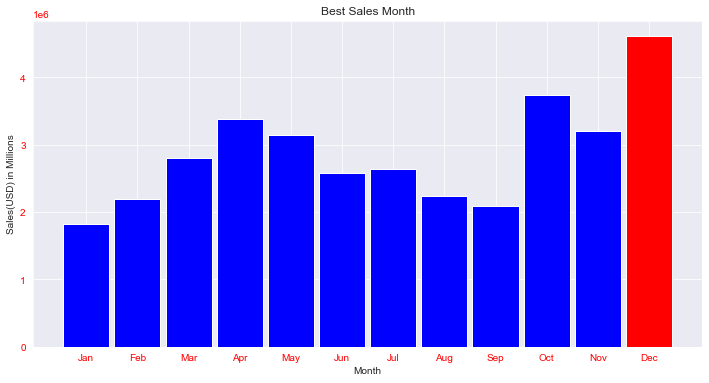

In [134]:
fig= plt.figure(figsize= (12, 6))

my_colors=['b','b','b','b','b','b','b','b','b','b','b','r']

plt.bar(results.index,results['sales'], color= my_colors, width= 0.9)

plt.xlabel('Month')
ax= fig.add_subplot(111)

ax.set_xticks(np.arange(len(results.index)))


plt.ylabel('Sales(USD) in Millions')


plt.title('Best Sales Month')
ax= plt.gca()

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
 
plt.show()

### Highest Sales by city

In [133]:
results1 = all_df.groupby('city_state').sum()
results1.sort_values(by='sales', ascending= True, inplace = True)
results1

,quantity ordered,price each,sales
city_state,,,
Portland (ME),2750,4.471893e+05,4.497583e+05
Austin (TX),11153,1.809874e+06,1.819582e+06
Portland (OR),11303,1.860558e+06,1.870732e+06
Seattle (WA),16553,2.733296e+06,2.747755e+06
Dallas (TX),16730,2.752628e+06,2.767975e+06
Atlanta (GA),16602,2.779908e+06,2.795499e+06
Boston (MA),22528,3.637410e+06,3.661642e+06
New York City (NY),27932,4.635371e+06,4.664317e+06
Los Angeles (CA),33289,5.421435e+06,5.452571e+06


<ipython-input-138-2e8872194087>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= fig.add_subplot(111)


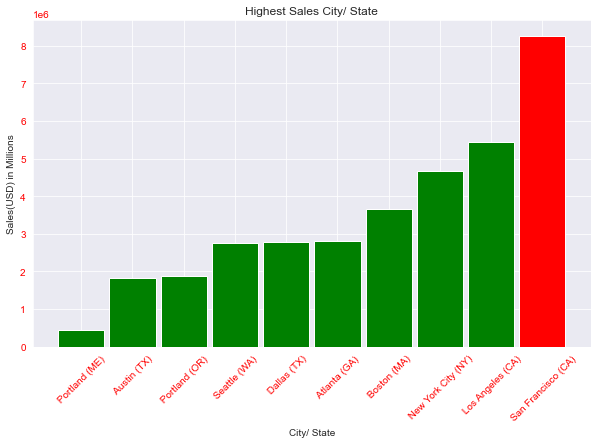

In [138]:
fig= plt.figure(figsize= (10, 6))

my_colors=['g','g','g','g','g','g','g','g','g','r']

plt.bar(results1.index,results1['sales'], color= my_colors, width= 0.9)

plt.xlabel('City/ State')
ax= fig.add_subplot(111)

ax.set_xticks(np.arange(len(results1.index)))


plt.ylabel('Sales(USD) in Millions')


plt.title('Highest Sales City/ State')
ax= plt.gca()

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
ax.set_xticklabels(results1.index, rotation = 45) 
plt.show()

### What of the day should Advertisement be Displayed?

In [139]:
all_df['order date']= pd.to_datetime(all_df['order date']) 

In [148]:
all_df['hour']= all_df['order date'].dt.hour

all_df['minute']= all_df['order date'].dt.minute

In [189]:
results2 = all_df.groupby('hour').count()
results2.sort_values(by='sales', ascending= True, inplace = True)
results2

,order id,product,quantity ordered,price each,order date,purchase address,month,sales,city,state,city_state,minute
hour,,,,,,,,,,,,
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


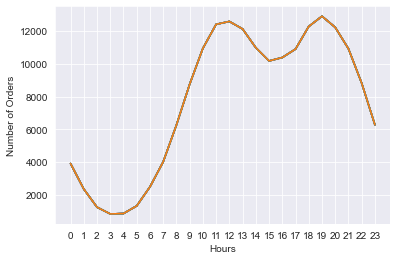

In [156]:
plt.plot(results2.index, results2)
plt.xticks(results2.index)
plt.ylabel('Number of Orders')
plt.xlabel('Hours')
plt.show()

# Advertisement Should be maximized around 11 am and/or 7pm (19)

### What products are most often sold together?

In [168]:
#all_df['order id'].duplicated().sum()
dupl= all_df[all_df['order id'].duplicated(keep=False)]
dupl.head()

,order id,product,quantity ordered,price each,order date,purchase address,month,sales,city,state,city_state,hour,minute
70744,144271,Lightning Charging Cable,1,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",Jan,14.95,San Francisco,CA,San Francisco (CA),23,2
70743,144271,iPhone,1,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",Jan,700.00,San Francisco,CA,San Francisco (CA),23,2
70813,144339,iPhone,1,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",Jan,700.00,Los Angeles,CA,Los Angeles (CA),14,33
70814,144339,Wired Headphones,1,11.99,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",Jan,11.99,Los Angeles,CA,Los Angeles (CA),14,33
70820,144344,USB-C Charging Cable,1,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",Jan,11.95,Boston,MA,Boston (MA),22,26


In [170]:
dupl.loc['group_items']= dupl.groupby('order id')['product'].transform(lambda x: ','.join(x))
dupl.head()

C:\Users\dema\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,order id,product,quantity ordered,price each,order date,purchase address,month,sales,city,state,city_state,hour,minute,group_items
70744,144271,Lightning Charging Cable,1.0,14.95,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",Jan,14.95,San Francisco,CA,San Francisco (CA),23.0,2.0,"Lightning Charging Cable,iPhone"
70743,144271,iPhone,1.0,700.00,2019-01-28 23:02:00,"2 Cherry St, San Francisco, CA 94016",Jan,700.00,San Francisco,CA,San Francisco (CA),23.0,2.0,"Lightning Charging Cable,iPhone"
70813,144339,iPhone,1.0,700.00,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",Jan,700.00,Los Angeles,CA,Los Angeles (CA),14.0,33.0,"iPhone,Wired Headphones"
70814,144339,Wired Headphones,1.0,11.99,2019-01-21 14:33:00,"953 Hickory St, Los Angeles, CA 90001",Jan,11.99,Los Angeles,CA,Los Angeles (CA),14.0,33.0,"iPhone,Wired Headphones"
70820,144344,USB-C Charging Cable,1.0,11.95,2019-01-25 22:26:00,"188 14th St, Boston, MA 02215",Jan,11.95,Boston,MA,Boston (MA),22.0,26.0,"USB-C Charging Cable,Google Phone"


In [171]:
dupl= dupl[['order id', 'group_items']].drop_duplicates()

dupl.head()

,order id,group_items
70744,144271,"Lightning Charging Cable,iPhone"
70813,144339,"iPhone,Wired Headphones"
70820,144344,"USB-C Charging Cable,Google Phone"
70870,144394,"Google Phone,Wired Headphones"
71073,144584,"USB-C Charging Cable,Google Phone"


In [183]:
dupl= dupl.dropna()

In [188]:
count= Counter()

for row in dupl['group_items']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('Lightning Charging Cable', 'iPhone') 525
('USB-C Charging Cable', 'Google Phone') 522
('iPhone', 'Lightning Charging Cable') 490
('Google Phone', 'USB-C Charging Cable') 477
('Wired Headphones', 'iPhone') 253
('Wired Headphones', 'Google Phone') 233
('iPhone', 'Wired Headphones') 209
('USB-C Charging Cable', 'Vareebadd Phone') 198
('iPhone', 'Apple Airpods Headphones') 191
('Google Phone', 'Wired Headphones') 190


### What Product sold the most?

In [196]:
results3= all_df.groupby('product').sum()
results3.sort_values(by='quantity ordered', ascending= True, inplace = True)
results3

,quantity ordered,price each,sales,hour,minute
product,,,,,
LG Dryer,646,387600.00,387600.00,9326,19043
LG Washing Machine,666,399600.00,399600.00,9785,19462
Vareebadd Phone,2068,826000.00,827200.00,29472,61835
20in Monitor,4129,451068.99,454148.71,58764,122252
ThinkPad Laptop,4130,4127958.72,4129958.70,59746,121508
Macbook Pro Laptop,4728,8030800.00,8037600.00,68261,137574
Flatscreen TV,4819,1440000.00,1445700.00,68815,142789
Google Phone,5532,3315000.00,3319200.00,79479,162773
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480


<ipython-input-203-8dd291865ed5>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax= fig.add_subplot(111)


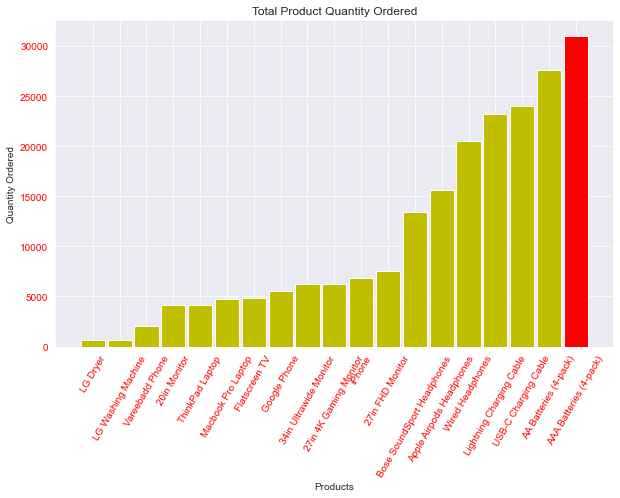

In [203]:
fig= plt.figure(figsize= (10, 6))

my_colors=['y','y','y','y','y','y','y','y','y','y', 'y','y', 'y', 'y', 'y','y', 'y', 'y', 'r']

plt.bar(results3.index,results3['quantity ordered'], color= my_colors, width= 0.9)

plt.xlabel('Products')

plt.ylabel('Quantity Ordered')
ax= fig.add_subplot(111)

ax.set_xticks(np.arange(len(results3.index)))


plt.title('Total Product Quantity Ordered')
ax= plt.gca()

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')
ax.set_xticklabels(results3.index, rotation = 60) 
plt.show()

In [218]:
results4= all_df.groupby('product').mean()
results4.sort_values(by='quantity ordered', ascending= True, inplace = True)
results4

,quantity ordered,price each,sales,hour,minute
product,,,,,
LG Washing Machine,1.000000,600.00,600.000000,14.692192,29.222222
LG Dryer,1.000000,600.00,600.000000,14.436533,29.478328
ThinkPad Laptop,1.000484,999.99,1000.474491,14.473353,29.435078
Macbook Pro Laptop,1.000847,1700.00,1701.439458,14.449831,29.122354
iPhone,1.001023,700.00,700.716165,14.419322,29.477930
Google Phone,1.001267,600.00,600.760181,14.385339,29.461176
Vareebadd Phone,1.001453,400.00,400.581114,14.272155,29.944310
27in 4K Gaming Monitor,1.002247,389.99,390.866382,14.593258,29.587640
34in Ultrawide Monitor,1.002912,379.99,381.096588,14.411260,29.684517


In [ ]:
plt.rcParams['figure.size']= [7.50, 3.50]
plt.rcParams['figure.autolayout']= True

fig, ax= plt.subplots()
results4.index

<ipython-input-257-d94adaa83b82>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(results4.index, rotation = 'vertical', size= 10)


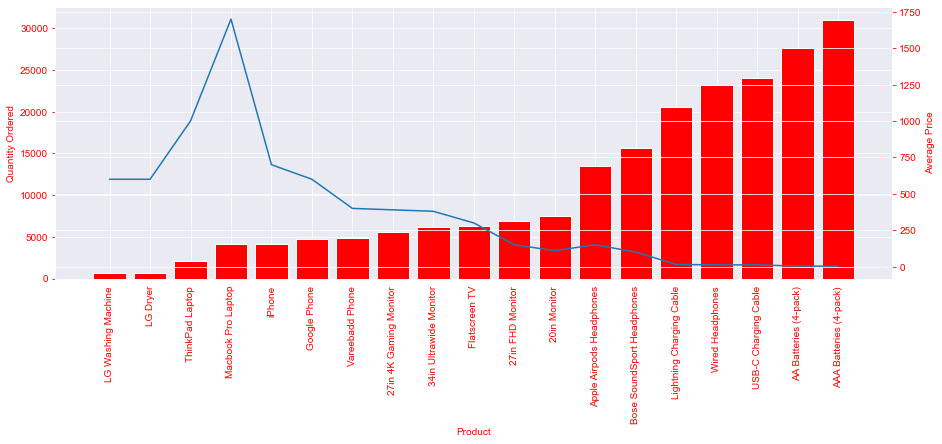

In [257]:
fig, ax1= plt.subplots(figsize=(15,5))
ax1= plt.gca()
ax2= ax1.twinx()

ax1.bar(results3.index,results3['quantity ordered'], color= 'r')
ax2.plot(results4.index, results4['price each'])

ax1.set_xlabel('Product', color='r')
ax1.set_ylabel('Quantity Ordered', color= 'r')

ax2.set_ylabel('Average Price', color='r')
ax1.tick_params(axis='x', colors='red')
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='x', colors='red')
ax2.tick_params(axis='y', colors='red')

ax1.set_xticklabels(results4.index, rotation = 'vertical', size= 10)
plt.show()